In [8]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


In [9]:
# read data
df = pd.read_csv('data.csv')
# data overview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# shuffle the data because data in series
df = df.sample(frac=1)

df.iloc[:10]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
210,881046502,M,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.095610,...,27.84,158.30,1656.0,0.1178,0.2920,0.38610,0.19200,0.2909,0.05865,NaN
442,90944601,B,13.78,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,...,17.50,97.90,706.6,0.1072,0.1071,0.03517,0.03312,0.1859,0.06810,NaN
438,909231,B,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.022930,...,28.01,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911,NaN
40,855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.020310,...,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146,NaN
257,886776,M,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.124200,...,22.66,119.80,928.8,0.1765,0.4503,0.44290,0.22290,0.3258,0.11910,NaN
45,857010,M,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,...,21.32,150.60,1567.0,0.1679,0.5090,0.73450,0.23780,0.3799,0.09185,NaN
373,901288,M,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.089410,...,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055,NaN
73,859983,M,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.050690,...,20.86,110.30,812.4,0.1411,0.3542,0.27790,0.13830,0.2589,0.10300,NaN
164,8712289,M,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.097020,...,28.22,184.20,2403.0,0.1228,0.3583,0.39480,0.23460,0.3589,0.09187,NaN
160,8711561,B,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.037380,...,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987,NaN


In [11]:
# drop the unnamed and id columns.
df = df.drop(columns=['Unnamed: 32', 'id'])

# no of rows and columns
print(df.shape)

# Checking the data types
print(df.dtypes)

(569, 31)
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave po

In [12]:
# check for null values in dataset
df.isnull().values.any()

False

In [18]:
# Count class labels
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

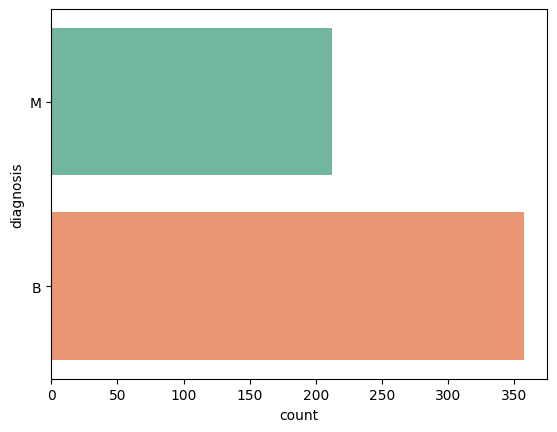

In [14]:
# Count each label
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

<AxesSubplot:>

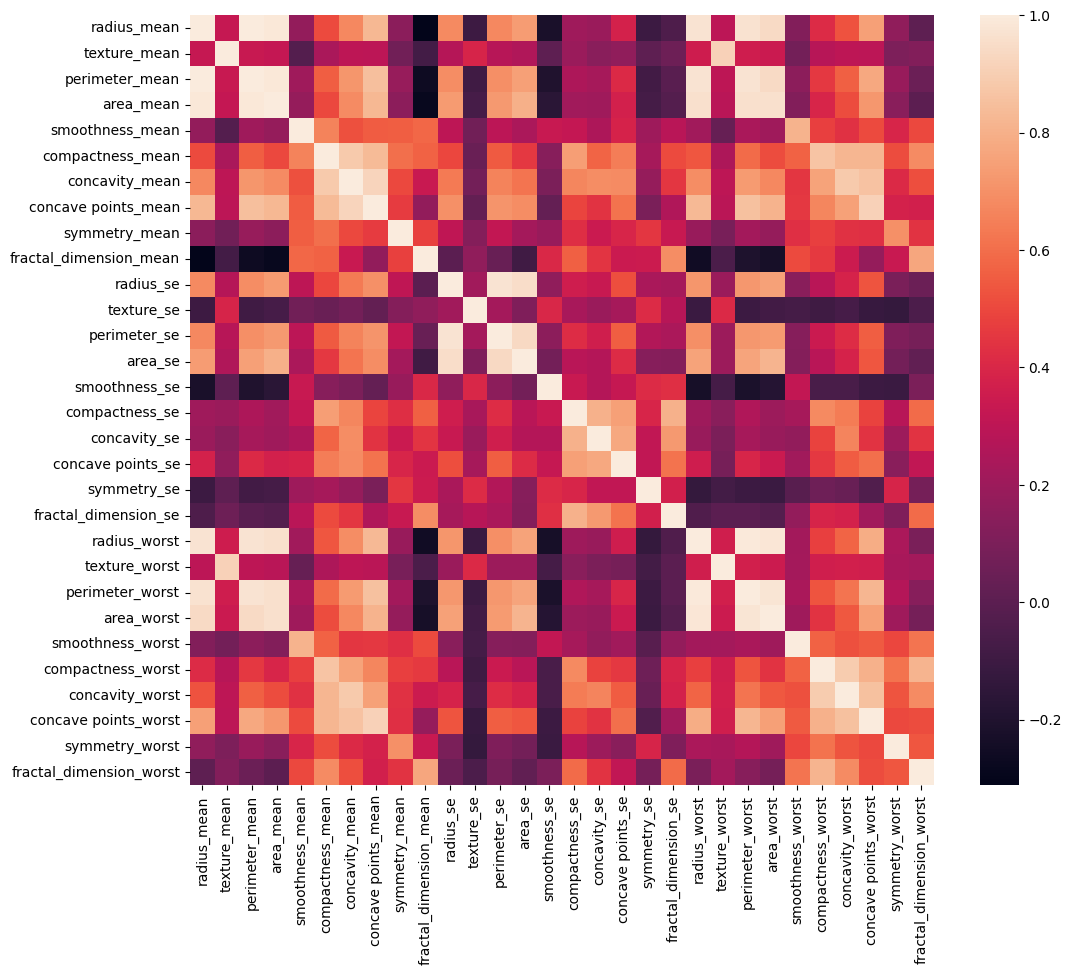

In [15]:
# Finding correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

diagnosis
B    357
M    212
dtype: int64


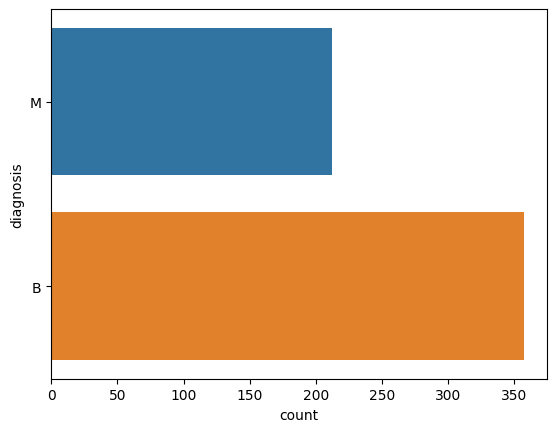

In [19]:
print(df.groupby('diagnosis').size())
sns.countplot(y=df['diagnosis'],label="Count")
plt.show()

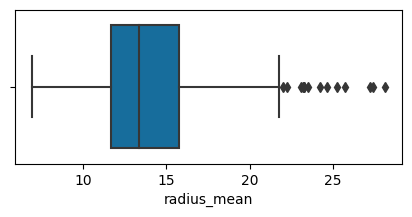

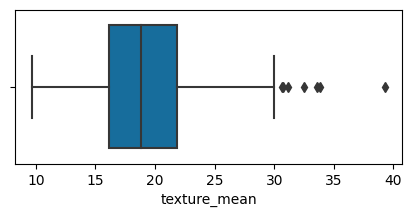

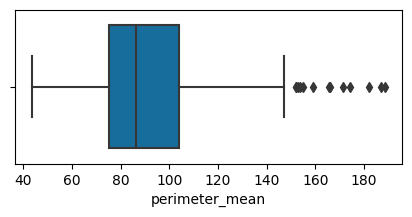

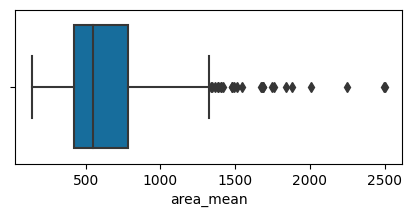

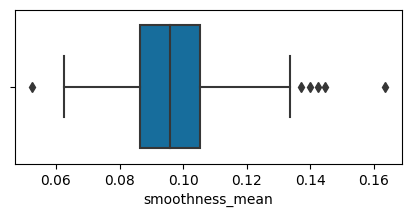

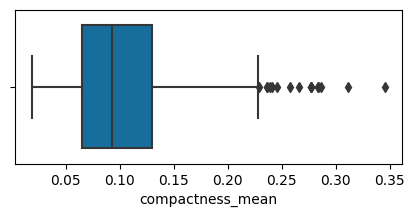

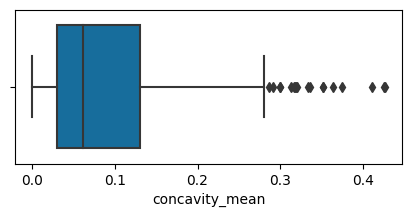

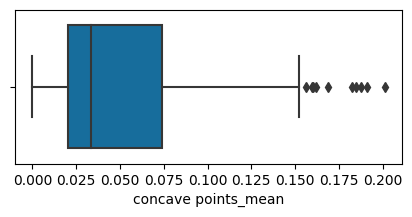

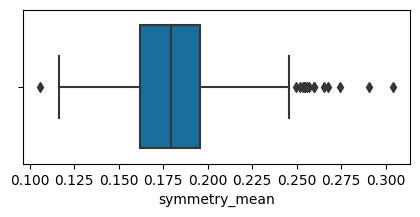

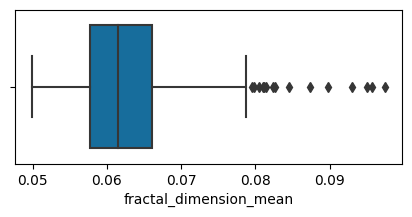

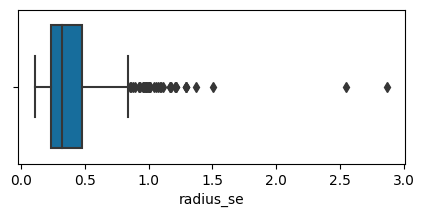

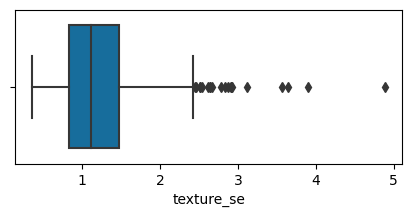

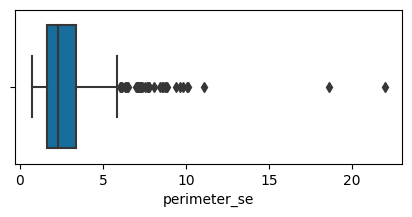

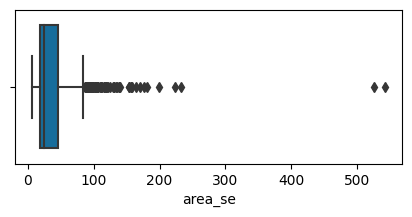

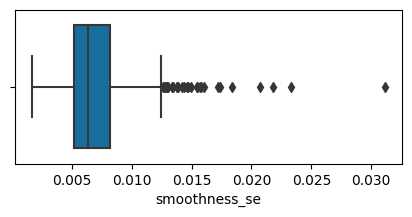

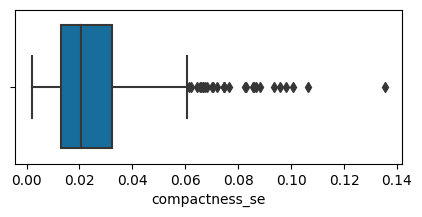

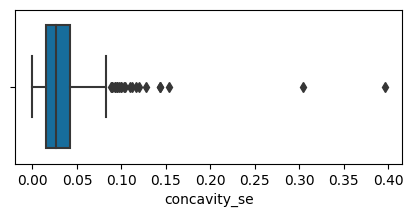

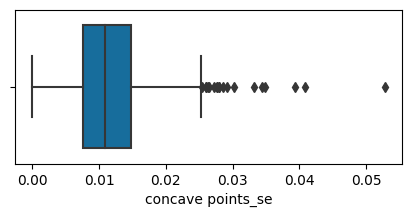

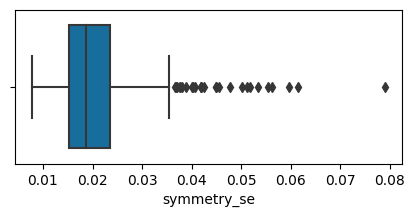

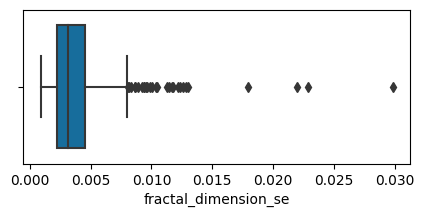

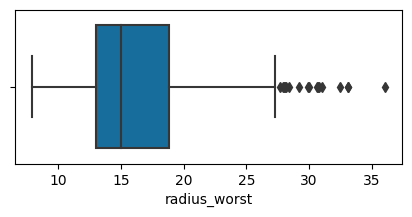

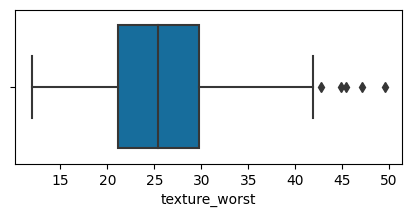

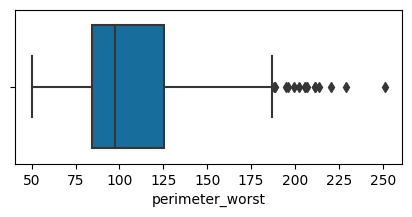

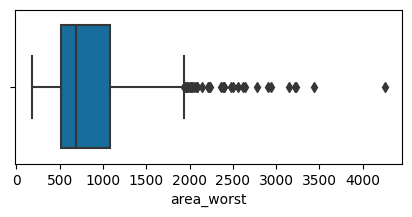

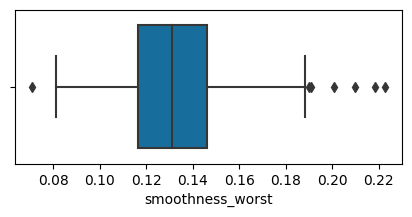

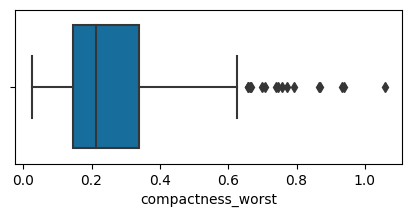

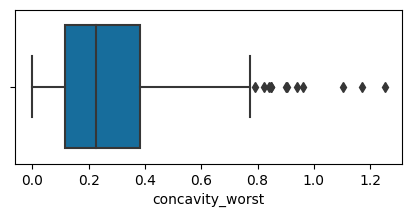

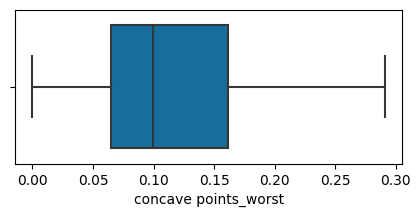

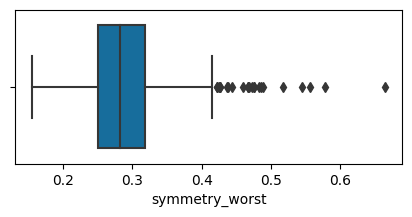

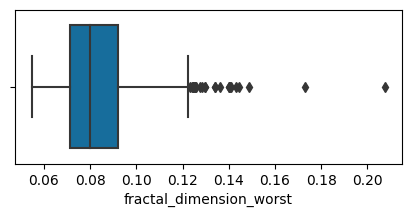

In [20]:
# box plot to check outlier in each category
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(df)


In [21]:
# Quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1

# quartiles and interquartile range

df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape


((569, 31), (398, 31))

In [22]:
# Separate labels and features
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']

In [23]:
# Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [24]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 30), (120, 30), (278,), (120,))

In [26]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

# custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)


In [27]:
# cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}


In [28]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [29]:
# acc list and rcc list stores the output of each model
acc = []
roc = []


In [30]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Naive Bayes : 
Training Set Accuracy :  0.9424460431654677
Test Set Accuracy 0.9583333333333334 ROC 0.9604037267080746


In [31]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 6 6 7 7 7 7 6 7 6]
True Negative:  [19 19 21 21 19 20 20 21 19 17]
False Negative:  [1 1 1 0 0 0 0 1 0 1]
False Positive:  [2 2 0 0 2 1 1 0 1 3]
Accuracy:  [0.89 0.89 0.96 1.   0.93 0.96 0.96 0.96 0.96 0.85]


In [32]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

# cross validation shows how accurate our model is
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.9424460431654677
Test Set Accuracy 0.9166666666666666 ROC 0.8835403726708074
True Positive:  [6 5 6 7 5 7 7 6 6 6]
True Negative:  [21 21 21 21 20 21 20 21 19 19]
False Negative:  [1 2 1 0 2 0 0 1 1 1]
False Positive:  [0 0 0 0 1 0 1 0 1 1]
Accuracy:  [0.96 0.93 0.96 1.   0.89 1.   0.96 0.96 0.93 0.93]


In [33]:
# Support Vector Machine
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Support Vector Machine : 
Training Set Accuracy :  0.9712230215827338
Test Set Accuracy 0.925 ROC 0.8641304347826086
True Positive:  [6 6 6 7 5 7 7 6 7 6]
True Negative:  [20 20 21 21 21 21 20 21 19 20]
False Negative:  [1 1 1 0 2 0 0 1 0 1]
False Positive:  [1 1 0 0 0 0 1 0 1 0]
Accuracy:  [0.93 0.93 0.96 1.   0.93 1.   0.96 0.96 0.96 0.96]


In [34]:
# KNN
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
K-Nearest Neighbors : 
Training Set Accuracy :  0.9388489208633094
Accuracy 0.9333333333333333 ROC 0.8944099378881987
True Positive:  [5 5 6 6 5 6 7 6 6 4]
True Negative:  [21 20 21 21 19 20 21 21 18 20]
False Negative:  [2 2 1 1 2 1 0 1 1 3]
False Positive:  [0 1 0 0 2 1 0 0 2 0]
Accuracy:  [0.93 0.89 0.96 0.96 0.86 0.93 1.   0.96 0.89 0.89]


In [35]:
# Random Forest
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Random Forest : 
Training Set Accuracy :  0.9928057553956835
Accuracy 0.95 ROC 0.9177018633540373
True Positive:  [6 5 6 7 6 6 7 6 7 4]
True Negative:  [21 20 21 21 20 21 21 21 19 20]
False Negative:  [1 2 1 0 1 1 0 1 0 3]
False Positive:  [0 1 0 0 1 0 0 0 1 0]
Accuracy:  [0.96 0.89 0.96 1.   0.93 0.96 1.   0.96 0.96 0.89]


Text(0.5, 0, 'Algortihms')

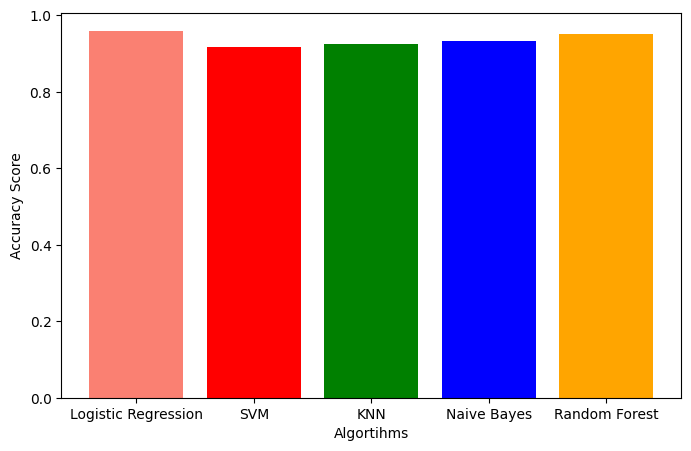

In [36]:
# accuracy score
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], acc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')


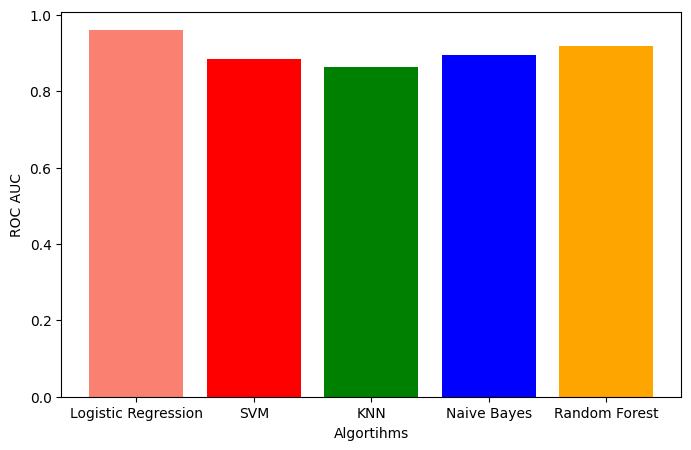

In [37]:
# roc-auc
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], roc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()